# **Problem Statement**
We need to build a solution for extracting structured information from scanned invoices or invoice images. The data we need to fetch are:
*   Invoice number
*   Invoice date
*   GST number
*   Vendor name
*   Vendor address
*   Delivery address
*   Buyer Name
*   Buyer address
*   Item details (including prices, quantity, item codes, discount and taxation)
*   Total invoice amount
*   Total tax amount       

**HINT**
1. These invoices can be of varied formats so rule based data extraction is not feasible
2. Assume Invoice will be available as JPEG images
3. Invoices can be multi page
4. Item details can be in table with or without boundaries
5. The output should be a json file with key-value pairs
6. You are free to research/read to build an approach or a solution
7. Sample files available at: https://drive.google.com/drive/folders/1Lmv_t-SCSlnyqSkrgZLQ7k5BBYZJzKMB?usp=sharing
8. You can use other open source datasets as well if needed.

# **Introduction**

Effective and precise information extraction from invoices is crucial in the constantly shifting domain of business automation. Manual data entry is time-consuming and prone to mistakes, which could result in financial inconsistencies and operational inefficiencies. The best solution would offer a streamlined approach to extracting invoice data with precision and reliability by leveraging the capabilities of Machine Learning, Optical Character Recognition and Natural Language Processing.

<br>

An ideal workflow would be as follows:

<img src="https://drive.google.com/thumbnail?id=1PyI-DVorLoFDsDB4jho2K6tL_EYNmVrK&sz=w16000" width=1000px alt="Process Workflow">

### NOTE:
*   <b>Optical Character Recognition (OCR)</b> - identifying characters using the pixels in an image.
*   <b>Text Recognition</b> - recognizing characters, words, sentences, paragraphs, language, and other concepts of text organization using language models and document layouts.
*   <b>Information Extraction</b> - understanding the semantics and purpose of a piece of text.
*   <b>Text Extraction</b> - overall question of how to extract text using all three subtasks — detection, recognition, and information extraction.



# **Using OpenCV and OCR**

***Google's Tesseract*** is a popular software and is made up of the tesseract-ocr engine and wrappers tailored to particular languages, such as pytesseract for Python. Tesseract's most recent iterations use deep learning algorithms instead of the image processing and statistical models that were used in older versions. This library can read all image types (.jpeg,.png, .gif, .bmp, .tiff, etc.) and recognize text in images.

<br>

***Open Source Computer Vision (OpenCV)*** is a huge open-source library of programming functions to facilitate real-time computer vision, image processing, object detection, video/image search and retrieval etc.

In [1]:
# Install necessary libraries

!pip install opencv-python
!pip install pytesseract
!sudo apt install tesseract-ocr
!pip install matplotlib

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [2]:
# Import required packages

import cv2
import glob
import pytesseract
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

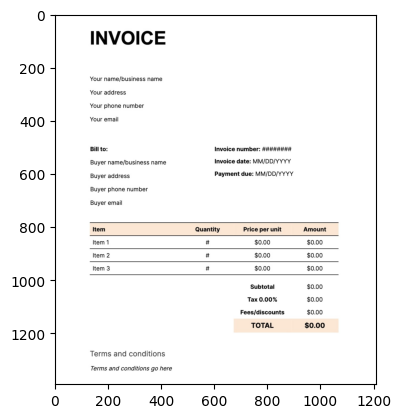

In [3]:
# Load the invoice and extract the data

invoice_image = cv2.imread("/content/Sample_Invoices/Custom_Invoice.jpg")
invoice_image = cv2.cvtColor(invoice_image, cv2.COLOR_BGR2RGB)
plt.imshow(invoice_image, aspect=1)

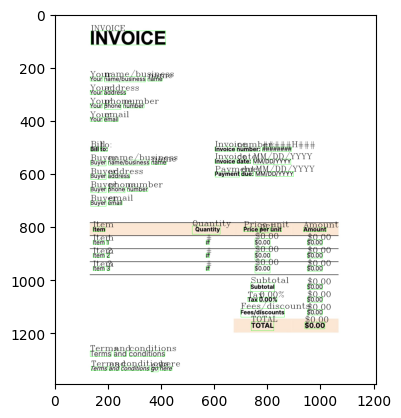

In [4]:
# Function to draw boxes around the detected text

def draw_bounding_boxes(invoice_img):

  raw_data = pytesseract.image_to_data(invoice_img)
  for count, data in enumerate(raw_data.splitlines()):
    if count > 0:
      data = data.split()
      if len(data) == 12:
        x, y, w, h, content = int(data[6]), int(data[7]), int(data[8]), int(data[9]), data[11]
        cv2.rectangle(invoice_img, (x, y), (w + x, h + y), (0, 255, 0), 1)
        cv2.putText(invoice_img, content, (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0) , 1)
  return invoice_img

invoice_image_with_bounding_box = draw_bounding_boxes(invoice_image)
plt.imshow(invoice_image_with_bounding_box)

# **Using Keras OCR**

***Keras-OCR*** a highly accurate library for extracting text with just a few lines of code. It provides out-of-the-box OCR models, a high-level API and end-to-end training pipeline to build new OCR models. This library can also read all image types (.jpeg,.png, .gif, .bmp, .tiff, etc.) and recognize text in images.


In [5]:
# Install necessary libraries

!pip install -q keras-ocr
!pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr

  Cloning https://github.com/faustomorales/keras-ocr.git to /tmp/pip-install-61y7zf41/keras-ocr_d96926b8434b4987af65eb6e63950879
  Running command git clone --filter=blob:none --quiet https://github.com/faustomorales/keras-ocr.git /tmp/pip-install-61y7zf41/keras-ocr_d96926b8434b4987af65eb6e63950879
  Resolved https://github.com/faustomorales/keras-ocr.git to commit b9c5a5871368fc337cbb6cd8f427b64a08626421
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of keras-ocr to determine which version is compatible with other requirements. This could take a while.
ERROR: Package 'keras-ocr' requires a different Python: 3.10.12 not in '<3.10,>=3.7.5'


In [6]:
# Import necessary libraries

import keras_ocr
import matplotlib.pyplot as plt

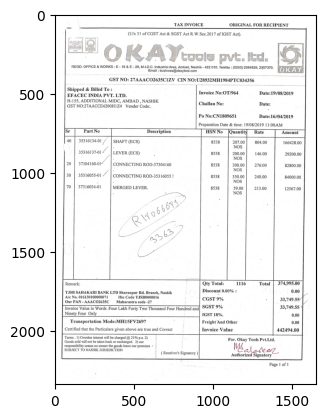

In [7]:
# Read images from folder path to image object

invoice_images = [
    keras_ocr.tools.read (img) for img in ['/content/Sample_Invoices/Okay Tools Pvt. Ltd-1.jpg',
                                          'https://www.generalblue.com/purchase-invoice/p/txk7jd789/f/simple-purchase-invoice-in-excel-md.png?v=a62000abda8269c01cb39a9a8804fa51',]
]

plt.imshow(cv2.imread("/content/Sample_Invoices/Okay Tools Pvt. Ltd-1.jpg"))

In [8]:
# Setup the Keras OCR Pipeline

pipeline = keras_ocr.pipeline.Pipeline()
prediction_groups = pipeline.recognize(invoice_images)

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
11/11 [==============================] - 7s 223ms/step


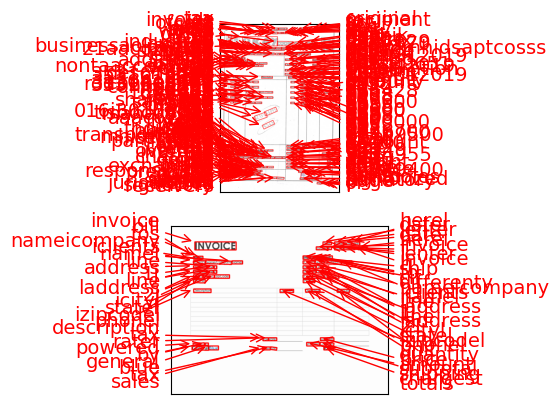

In [9]:
# Extract the text from invoice image

fig, axs = plt.subplots(nrows=len(invoice_images))
for ax, image, predictions in zip(axs, invoice_images, prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image,
                                    predictions=predictions,
                                    ax=ax)

# **Using Deep Learning**

***Efficient Sccurate Scene Text Detector (EAST)*** from OpenCV is a deep learning model with a novel architecture and training pattern. It makes use of a single neural network for the detection of text in a natural scene and uses Non-Max Suppression (NMS) along with Convolutional Network. It's a Fully Convolutional Network (FCN) which outputs per-pixel predictions of words or text lines and is said to be efficient in real-time processing at 13fps on 720p images.

Please read this [paper](https://arxiv.org/abs/1704.03155) to learn more about this approach

In [10]:
import os, sys
import numpy as np
import cv2
import time
from imutils.object_detection import non_max_suppression

In [11]:
# Load the EAST weights
# Download the TAR file from - https://learnopencv.com/deep-learning-based-text-detection-using-opencv-c-python/

!tar -xvzf "/content/frozen_east_text_detection.tar.gz" -C "/content/"

frozen_east_text_detection.pb


In [12]:
# Function to implement the EAST Scene text detector

def east_detect(image):
  layerNames = [
      "feature_fusion/Conv_7/Sigmoid",
    	"feature_fusion/concat_3"
  ]

  orig = image.copy()

  if len(image.shape) == 2:
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

  (H, W) = image.shape[:2]
  (newW, newH) = (320, 320) # Both height and width must be multiples of 32

  rW = W / float(newW)
  rH = H / float(newH)

  image = cv2.resize(image, (newW, newH))

  (H, W) = image.shape[:2]

  net = cv2.dnn.readNet("/content/frozen_east_text_detection.pb")

  blob = cv2.dnn.blobFromImage(image, 1.0, (W, H), (123.68, 116.78, 103.94), swapRB=True, crop=False)

  net.setInput(blob)

  (scores, geometry) = net.forward(layerNames)

  (numRows, numCols) = scores.shape[2:4]
  rects = []
  confidences = []

  for y in range(0, numRows):
      scoresData = scores[0, 0, y]
      xData0 = geometry[0, 0, y]
      xData1 = geometry[0, 1, y]
      xData2 = geometry[0, 2, y]
      xData3 = geometry[0, 3, y]
      anglesData = geometry[0, 4, y]

      for x in range(0, numCols):
          if scoresData[x] < 0.5:
              continue
          (offsetX, offsetY) = (x * 4.0, y * 4.0)
          angle = anglesData[x]
          cos = np.cos(angle)
          sin = np.sin(angle)
          h = xData0[x] + xData2[x]
          w = xData1[x] + xData3[x]
          endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
          endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
          startX = int(endX - w)
          startY = int(endY - h)
          rects.append((startX, startY, endX, endY))
          confidences.append(scoresData[x])

  boxes = non_max_suppression(np.array(rects), probs=confidences)
  for (startX, startY, endX, endY) in boxes:
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)
    cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)
  return orig

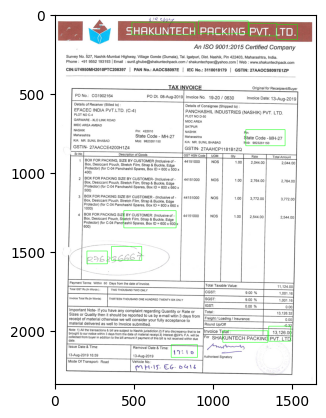

In [13]:
# Load the invoice image and extract the text

invoice_image = cv2.imread("/content/Sample_Invoices/Shakuntech Packing Pvt. Ltd-1.jpg")
invoice_image = cv2.cvtColor(invoice_image, cv2.COLOR_BGR2RGB)
output_image = east_detect(invoice_image)
plt.imshow(output_image)

# **Using Generative Language Models, Kor & LangChain**

***Generative Language Models*** accurately generates text that resembles human writing when given a prompt. Typical examples of generative AI systems include image generators (such as Midjourney or Stable Diffusion), large language models (such as GPT-4, PaLM, or Claude), code generation tools (such as Copilot), or audio generation tools (such as VALL-E or resemble.ai).

<br>

***LangChain*** is an open-source framework that simplifies developing applications using language models. It enables applications that are data-aware and agentic and comes with:


*   *Components:* abstractions for working with language models, along with a collection of implementations for each abstraction. Components are modular and easy-to-use, whether you are using the rest of the LangChain framework or not

*   *Off-the-shelf chains:* a structured assembly of components for accomplishing specific higher-level tasks

<br>

***Kor*** is a library built on LangChain that helps extract text from unstructured and semi-structured data into a custom-structured format. It is a thin wrapper on top of LLMs that helps to extract data using LLMs and makes the use of prompts easy and efficient.

<br>

This solution generates its responses in the JSON format (by default) making it easy to parse and create GUI applications. The solutions mentioned earlier would require further processing to generate outputs in JSON format.

In [14]:
# Install necessary libraries

!pip install kor
!pip install openai
!pip install langchain
!pip install pytesseract
!pip install opencv-python
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [15]:
# Import necessary modules

import io
import cv2
import pytesseract
from PIL import Image
from langchain.llms import OpenAI
from langchain.chat_models import JinaChat
from kor.nodes import Object, Text, Number
from kor.extraction import create_extraction_chain

In [16]:
# Define the schema for extracting the invoice number
invoice_number_schema = Object(
    id="invoice_number_extraction",
    description="extraction of relevant information from invoice",
    attributes=[
        Text(
            id="invoice_number",
            description="unique number (identifier) of given invoice",
            examples=[
                ("Invoice No. 19-20/1935", "PTII 9-20/858"),
                ("Invoice No: OT/964", "PWHO/1176"),
            ],
        )
    ],
    many=False,
)

# Define the schema for extracting the invoice date
invoice_date_schema = Object(
    id="date_extraction",
    description="extraction of date from the invoice",
    attributes=[
        Text(
            id="date",
            description="invoice date",
            examples=[
                ("Dated: 14/5/23", "14/05/23"),
            ],
        )
    ],
    many=False,
)

# Define the schema for extracting the invoice GSTIN/UIN
invoice_gst_schema = Object(
    id="gst_extraction",
    description="extraction of GSTIN from the invoice",
    attributes=[
        Text(
            id="gst",
            description="gstin is a unique value given to organizations",
            examples=[
                ("GSTIN/UIN: 27AACCE4200HIZ4", "27AAHCP1181BIZQ"),
                ("GSTIN No: 27AACCE4200HIZ4", "27AACCE4200HIZ4"),
            ],
        )
    ],
    many=False,
)

# Define the schema for extracting address details
address_schema = Object(
    id="address",
    description="address details",
    attributes=[
        Text(id="name", description="the name of person and organization"),
        Text(
            id="address_line",
            description="the local delivery information such as street, building number, PO box, or apartment portion of a postal address",
        ),
        Text(id="city", description="the city portion of the address"),
        Number(id="postal_code", description="the postal code portion of the address"),
    ],
    examples=[
        (
            "Vasav Precision Engineering H45, MlDC. Satpur, Nashik-422007",
            {
                "name": "Vasav Precision Engineering",
                "address_line": "H45, MlDC Satpur",
                "city": "Nashik",
                "postal_code": "422007",
            },
        ),
    ],
    many=False,
)

# Define the billing address schema based on the address schema
billing_address_schema = address_schema.replace(
    id="billing_address",
    description="where the bill for a product or service is sent so it can be paid by the recipient",
)

# Define the schema for extracting product details from the invoice
products_schema = Object(
    id="bill",
    description="the details of bill",
    attributes=[
        Text(
            id="product_description",
            description="the description of the product or service",
        ),
        Number(id="count", description="number of units bought for the product"),
        Text(id="hsn", description="unique service accounting code for the product"),
        Number(id="unit_item_price", description="price per unit"),
        Number(
            id="product_total_price",
            description="the total price, which is number of units * unit_price",
        ),
    ],
    examples=[
        (
            "ROTARY OPERATING 8538 50.00 Nos. 1211.00 60,550.00",
            {
                "product_description": "ROTARY OPERATING",
                "count": 50,
                "hsn": "8538",
                "unit_item_price": 1211,
                "product_total_price": 60550,
            },
        ),
    ],
    many=True,
)

# Define the schema for extracting total bill information
total_bill_schema = Object(
    id="total_bill",
    description="the details of total amount, discounts and tax",
    attributes=[
        Number(
            id="total", description="the total amount before tax and delivery charges"
        ),
        Number(
            id="discount_amount",
            description="discount amount is total cost * discount %",
        ),
        Number(
            id="tax_amount",
            description="tax amount is tax_percentage * (total - discount_amount). If discount_amount is 0, then its tax_percentage * total",
        ),
        Number(id="delivery_charges", description="the cost of shipping products"),
        Number(
            id="final_total",
            description="the total price or balance after removing tax, adding delivery and tax from total",
        ),
    ],
    examples=[
        (
            "Taxable Value ₹60,550.00 Central Tax ₹5,449.50 Amount ₹71,449.00",
            {
                "total": 60550,
                "discount_amount": 0,
                "tax_amount": 5449,
                "delivery_charges": 0,
                "final_total": 71449,
            },
        ),
    ],
    many=False,
)

# Define the invoice schema combining all the extracted information
invoice_schema = Object(
    id="invoice_information",
    description="relevant invoice parsing from raw extracted text",
    attributes=[
        invoice_number_schema,
        invoice_date_schema,
        billing_address_schema,
        invoice_gst_schema,
        products_schema,
        total_bill_schema,
    ],
    many=True,
)

In [17]:
# Setup closed-source JinaChat API. You can replace this with OpenAI or any other chat-based LLM
# Signup with JinaChat to get your free API Key

llm = JinaChat(
    temperature=0.2,
    streaming=True,
    jinachat_api_key="YOUR_API_KEY",
)

In [18]:
# Prepare the inputs

invoice_image = cv2.imread("/content/Sample_Invoices/Shakuntech Packing Pvt. Ltd-1.jpg")
custom_config = r'-l eng --oem 3 --psm 6'
processed_text = pytesseract.image_to_string(invoice_image, config=custom_config)

In [19]:
# Setup the extraction chain

invoice_chain = create_extraction_chain(llm, invoice_schema, encoder_or_encoder_class="json")
response = invoice_chain.run(text=processed_text)
print(response)

{'data': {}, 'raw': '{\n  "invoice_number": "19-20 / 0630",\n  "invoice_date": "13-Aug-2019",\n  "billing_address": {\n    "name": "EFACEC INDIA PVT.LTD.",\n    "address": "PLOT NO C-4, GARWARE - XLO LINK ROAD MIDC AREA, NASHIK Pin: 422010",\n    "gstin": "27AACCE4200H1Z4"\n  },\n  "consignee": {\n    "name": "PANCHASHIL INDUSTRIES (NASHIK) PVT. LTD.",\n    "address": "PLOT NO D-50, MIDC AREA AMBAD SATPUR, NASHIK Pin:"\n  },\n  "items": [\n    {\n      "description": "BOX FOR PACKING, SIZE BY CUSTOMER",\n      "hsn": "44151000",\n      "quantity": 1,\n      "rate": 2044,\n      "total": 2044\n    },\n    {\n      "description": "BOX FOR PACKING SIZE BY CUSTOMER.",\n      "hsn": "44151000",\n      "quantity": 1,\n      "rate": 2764,\n      "total": 2764\n    }\n  ],\n  "total_bill": 13126,\n  "sgst": 1001.16,\n  "invoice_total": 13126.32\n}', 'errors': [], 'validated_data': {}}


# **Using DocTR Library**

***DocTR*** is a seamless, high-performing & accessible custom document understanding library for OCR-related tasks powered by Deep Learning. It provides:
* Efficient ways to parse textual information (localize and identify each word) from your documents.

* Guidance on how to integrate this in your current architecture.

It is very easy to generate results in JSON format much like the Kor & Langchain solution.

In [20]:
# Install necessary libraries

!pip install python-doctr
!pip install "python-doctr[tf]"     # For TensorFlow
!pip install "python-doctr[torch]"  # For PyTorch
# !git clone https://github.com/mindee/doctr.git
!pip install -e doctr/.[tf]         # For TensorFlow
!pip install -e doctr/.[torch]      # For PyTorch
# !pip install rapidfuzz==2.15.1

!sudo apt install libcairo2-dev pkg-config
!pip install pycairo
!pip install python-doctr[torch]@git+https://github.com/mindee/doctr.git
!pip install python-doctr[tf]@git+https://github.com/mindee/doctr.git

Obtaining file:///content/doctr
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for python-doctr (pyproject.toml) ... done
  Created wheel for python-doctr: filename=python_doctr-0.7.0a0-0.editable-py3-none-any.whl size=17128 sha256=96867ae8a849b6910de5cf14f08f44b75ed5d0912547aaf122d19227cdd72e80
  Stored in directory: /tmp/pip-ephem-wheel-cache-fjyxcxq0/wheels/11/6c/0d/cd3d9915ea5e2c63065bac30cfb09530dd9182416ef7bd534a
Successfully built python-doctr
  Attempting uninstall: python-doctr
    Found existing installation: python-doctr 0.7.0a0
    Uninstalling python-doctr-0.7.0a0:
      Successfully uninstalled python-doctr-0.7.0a0
Obtaining file:///content/doctr
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... don

In [21]:
# Import necessary libraries

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [22]:
# Instantiate the OCR model

model = ocr_predictor(pretrained=True)

DEBUG:tensorflow:Layer lstm will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_1 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_1 will use cuDNN kernels when running on GPU.
DEBUG:tensorflow:Layer lstm_1 will use cuDNN kernels when running on GPU.


{'pages': [{'page_idx': 0, 'dimensions': (2338, 1654), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((0.35505663353990324, 0.0068359375), (0.4599680225967352, 0.0244140625)), 'lines': [{'geometry': ((0.35505663353990324, 0.0068359375), (0.4599680225967352, 0.0244140625)), 'words': [{'value': 'tecy', 'confidence': 0.006879475899040699, 'geometry': ((0.35505663353990324, 0.0068359375), (0.4599680225967352, 0.0244140625))}]}], 'artefacts': []}, {'geometry': ((0.27223185270556227, 0.03515625), (0.922406382255139, 0.0615234375)), 'lines': [{'geometry': ((0.27223185270556227, 0.03515625), (0.922406382255139, 0.0615234375)), 'words': [{'value': 'SHAKUNTELH', 'confidence': 0.8192327618598938, 'geometry': ((0.27223185270556227, 0.0361328125), (0.5372711513754534, 0.0576171875))}, {'value': 'PACKING', 'confidence': 0.7408650517463684, 'geometry': ((0.5552165205562273, 0.037109375), (0.7277681472944377, 0.05859375))},

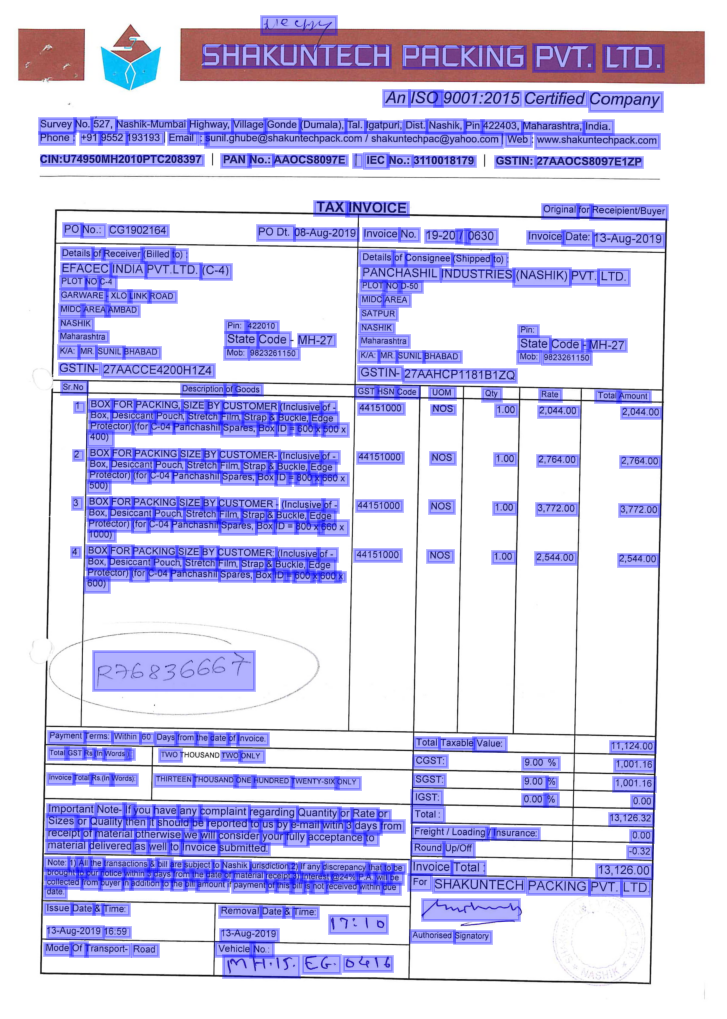

In [23]:
doc = DocumentFile.from_images("/content/Sample_Invoices/Shakuntech Packing Pvt. Ltd-1.jpg")
result = model(doc)
json_output = result.export()
print(json_output)
result.show(doc)

# **Using Application Programming Interface**

***Mindee*** is a powerful OCR software and an API-first platform that helps developers automate applications' workflows by standardizing the document processing layer through data recognition for key information using computer vision and machine learning.

The result from this solution is more accurate than most of the other approaches discussed in this notebook and the ones not discussed. Its robust solution makes it very easy to generate results in JSON format much like the Kor & Langchain and DocTR solutions.

In [24]:
# Install necessary libraries

!pip install mindee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.3/76.3 kB 662.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.6 MB/s eta 0:00:00


In [25]:
# Import necessary libraries

from mindee import Client, documents

In [26]:
# Setup the Mindee Client
# Signup with Mindee to get your free API Key

mindee_client = Client(api_key="YOUR_MINDEE_API_KEY")
url = "https://api.mindee.net/v1/products/mindee/invoices/v4/predict"

In [27]:
# Parse the input invoice image

input_doc = mindee_client.doc_from_path("/content/Sample_Invoices/Okay Tools Pvt. Ltd-1.jpg")
result = input_doc.parse(documents.TypeInvoiceV4)
print(result.http_response)

{'api_request': {'error': {}, 'resources': ['document'], 'status': 'success', 'status_code': 201, 'url': 'https://api.mindee.net/v1/products/mindee/invoices/v4/predict'}, 'document': {'id': '9e4ebf16-7052-4bbc-ab8d-13546abb120b', 'inference': {'extras': {}, 'finished_at': '2023-08-19T08:29:13.051710', 'is_rotation_applied': True, 'pages': [{'extras': {}, 'id': 0, 'orientation': {'value': 0}, 'prediction': {'customer_address': {'confidence': 0.0, 'polygon': [[0.047, 0.228], [0.395, 0.228], [0.395, 0.242], [0.047, 0.242]], 'value': 'HW15AADDITIONAMIDD, AMBAD , NASHIK'}, 'customer_company_registrations': [], 'customer_name': {'confidence': 0.66, 'polygon': [[0.047, 0.213], [0.276, 0.213], [0.276, 0.228], [0.047, 0.228]], 'value': 'EFACEC INDIA PVT. LTD.'}, 'date': {'confidence': 0.99, 'polygon': [[0.78, 0.206], [0.912, 0.206], [0.912, 0.222], [0.78, 0.222]], 'value': '2019-08-19'}, 'document_type': {'value': 'INVOICE'}, 'due_date': {'confidence': 0.0, 'polygon': [], 'value': None}, 'invoi

Please check out the `streamlit_app.py` to view the ***Streamlit application*** that parses the Invoice images and returns the data in JSON format